## Soal 3 - SEA Games 2019

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://www2.2019seagames.com/countries/'
web = requests.get(url)
data = BeautifulSoup(web.content, 'html.parser')

#MENDAPATKAN DATA DARI TAG 'EM'
em = data.find_all('em')

count = []
ListMedal = []
for i in em:
    if len(count) == 0:
        count.append(i.text)
    elif len(count) == 2:
        count.append(i.text[6:])
    else:
        count.append(i.text)
        if len(count) == 6:
            ListMedal.append(count)
            count = []
            if len(ListMedal) == 11:
                break
# print(ListMedal)

GoldMedal = []
for i in range(len(ListMedal)):
    Gold = ListMedal[i][2]
    Gold = int(Gold)
    GoldMedal.append(Gold)
print(GoldMedal)

Asean = []
for i in range(len(ListMedal)):
    country = ListMedal[i][0]
    Asean.append(country)

Asean[3] = Asean[3][:4] + 'PDR'
Asean[0] = Asean[0][:6]
print(Asean)

[0, 3, 38, 2, 145, 7, 24, 57, 72, 0, 58]
['BRUNEI', 'CAMBODIA', 'INDONESIA', 'LAO PDR', 'MALAYSIA', 'MYANMAR', 'PHILIPPINES', 'SINGAPORE', 'THAILAND', 'TIMOR LESTE', 'VIETNAM']


In [3]:
url2 = 'https://rs.2019seagames.com/RS2019/mobiapp/MedalTally'
web2 = requests.get(url2)
data2 = BeautifulSoup(web2.content, 'html.parser')

small = data2.find_all('small')

count2 = []
ListMedal2 = []
for i in small[5:]:
    count2.append(i.text)
    if len(count2) == 5:
        ListMedal2.append(count2)
        count2 = []
        if len(ListMedal2) == 11:
            break
# print(ListMedal2)

GoldMedal2 = []
for i in range(len(ListMedal2)):
    Gold = ListMedal2[i][1]
    Gold = int(Gold)
    GoldMedal2.append(Gold)
# print(GoldMedal2)

Asean2 = []
for i in range(len(ListMedal2)):
    country = ListMedal2[i][0]
    Asean2.append(country)
# print(Asean2)

Rapihin = list(zip(Asean2, GoldMedal2))
Rapihin.sort()

Asean2 = []
for i in range(len(Rapihin)):
    x = Rapihin[i]
    Asean2.append(x[0])
Asean2[0] = Asean[0][:6]
print(Asean2)

GoldMedal2 = []
for i in range(len(Rapihin)):
    x = Rapihin[i]
    GoldMedal2.append(int(x[1]))
print(GoldMedal2)

['BRUNEI', 'CAMBODIA', 'INDONESIA', 'LAO PDR', 'MALAYSIA', 'MYANMAR', 'PHILIPPINES', 'SINGAPORE', 'THAILAND', 'TIMOR-LESTE', 'VIETNAM']
[2, 4, 72, 1, 55, 4, 149, 53, 92, 0, 98]


### Grafik Bar SEA GAMES 2017 & 2019

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

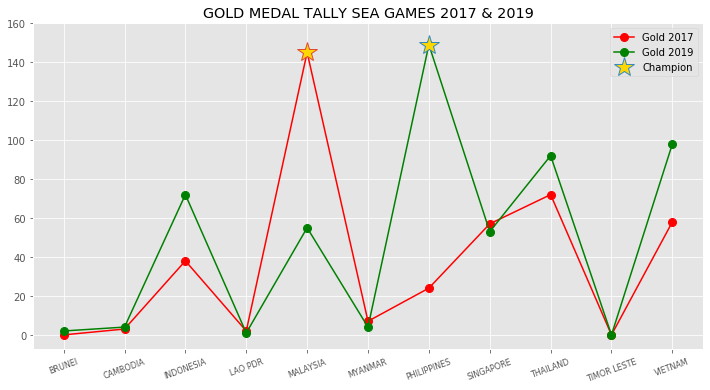

In [5]:
plt.figure('Tes', figsize=(12,6))
plt.style.use('ggplot')

df1 = pd.DataFrame({
    'x': Asean,
    'y': GoldMedal,
})

df2 = pd.DataFrame({
    'x': Asean2,
    'y': GoldMedal2,
})

plt.plot(df1['x'], df1['y'], color='red', marker='o', markersize = 8, label= 'Gold 2017')
plt.plot(df1['x'], df2['y'], color='green', marker='o', markersize = 8, label= 'Gold 2019')
plt.plot(Asean[GoldMedal.index(max(GoldMedal))], max(GoldMedal), '*', markersize = 20, 
    markerfacecolor = "gold")
plt.plot(Asean2[GoldMedal2.index(max(GoldMedal2))], max(GoldMedal2), '*', markersize = 20, 
    markerfacecolor = "gold", label='Champion')

plt.title('GOLD MEDAL TALLY SEA GAMES 2017 & 2019')
plt.xticks(rotation=20, fontsize = 8)
plt.yticks(np.arange(0, 170, step=20))
plt.legend()
plt.show()

### Grafik Pie SEA Games 2017

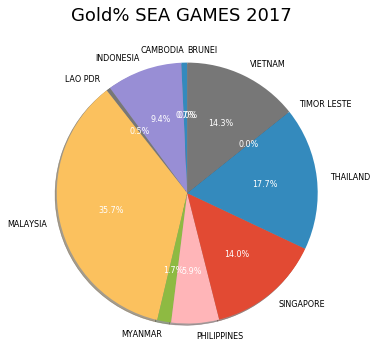

In [6]:
# Membuat chart berupa 'pie'
plt.suptitle('Gold% SEA GAMES 2017',fontsize=18, y=1.15)
presentase = GoldMedal
keterangan = Asean
x,y,z = plt.pie(
    presentase, labels=keterangan,shadow=True,
    counterclock=True, radius=1.5,startangle=90,
    textprops={'family':'dejavu sans','size': 8}, autopct='%1.1f%%'
)

for i in z:
    i.set_color('w')
plt.show()

### Grafik Pie SEA Games 2019

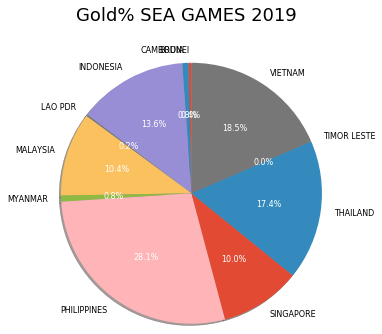

In [7]:
# Membuat chart berupa 'pie'
plt.suptitle('Gold% SEA GAMES 2019',fontsize=18, y=1.15)
presentase = GoldMedal2
keterangan = Asean
x,y,z = plt.pie(
    presentase, labels=keterangan,shadow=True,
    counterclock=True, radius=1.5,startangle=90,
    textprops={'family':'dejavu sans','size': 8}, autopct='%1.1f%%'
)

for i in z:
    i.set_color('w')
plt.show()